<a href="https://colab.research.google.com/github/lorenzo-arcioni/Applied-Mathematics-Hub/blob/main/Exploratory Data Analysis/Analisi_Iris.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisi esplorativa Iris

In questo notebook, analizziamo il dataset `Iris` fornito da [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html). Prima di realizzare un modello predittivo di qualunque genere, è bene effettuare un'analisi esplorativa del dataset, in modo da avere tutte le informazioni necessaria per realizzare e validare il modello correttamente.

## Descrizione dataset Iris



![iris-flower](Images/iris-flower.png)

## Caratteristiche del Dataset

Il dataset contiene quattro caratteristiche (features) misurate per ciascun fiore:

1. **Lunghezza del sepalo** (sepal length) in centimetri.
2. **Larghezza del sepalo** (sepal width) in centimetri.
3. **Lunghezza del petalo** (petal length) in centimetri.
4. **Larghezza del petalo** (petal width) in centimetri.

E la classe (target) che indica la specie dell'iris, che ha valori: 0, 1 o 2. Quindi

- **Iris-setosa**: 0
- **Iris-versicolor**: 1
- **Iris-virginica**: 2

## Obiettivo

L'obiettivo di questo notebook è quello di effettuare un'analisi esplorativa del dataset Iris.

## Analisi

### 1. Caricamento dei dati
Prima di tutto, caricheremo un dataset. In questo esempio, utilizzeremo il famoso dataset Iris fornito dalla libreria `sklearn`. Visualizzeremo anche i dati in un DataFrame per una migliore comprensione.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Caricamento del dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Creazione di un DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = pd.Series(y).apply(lambda x: iris.target_names[x])

# Visualizzazione delle prime righe del DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
# Informazioni sul DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

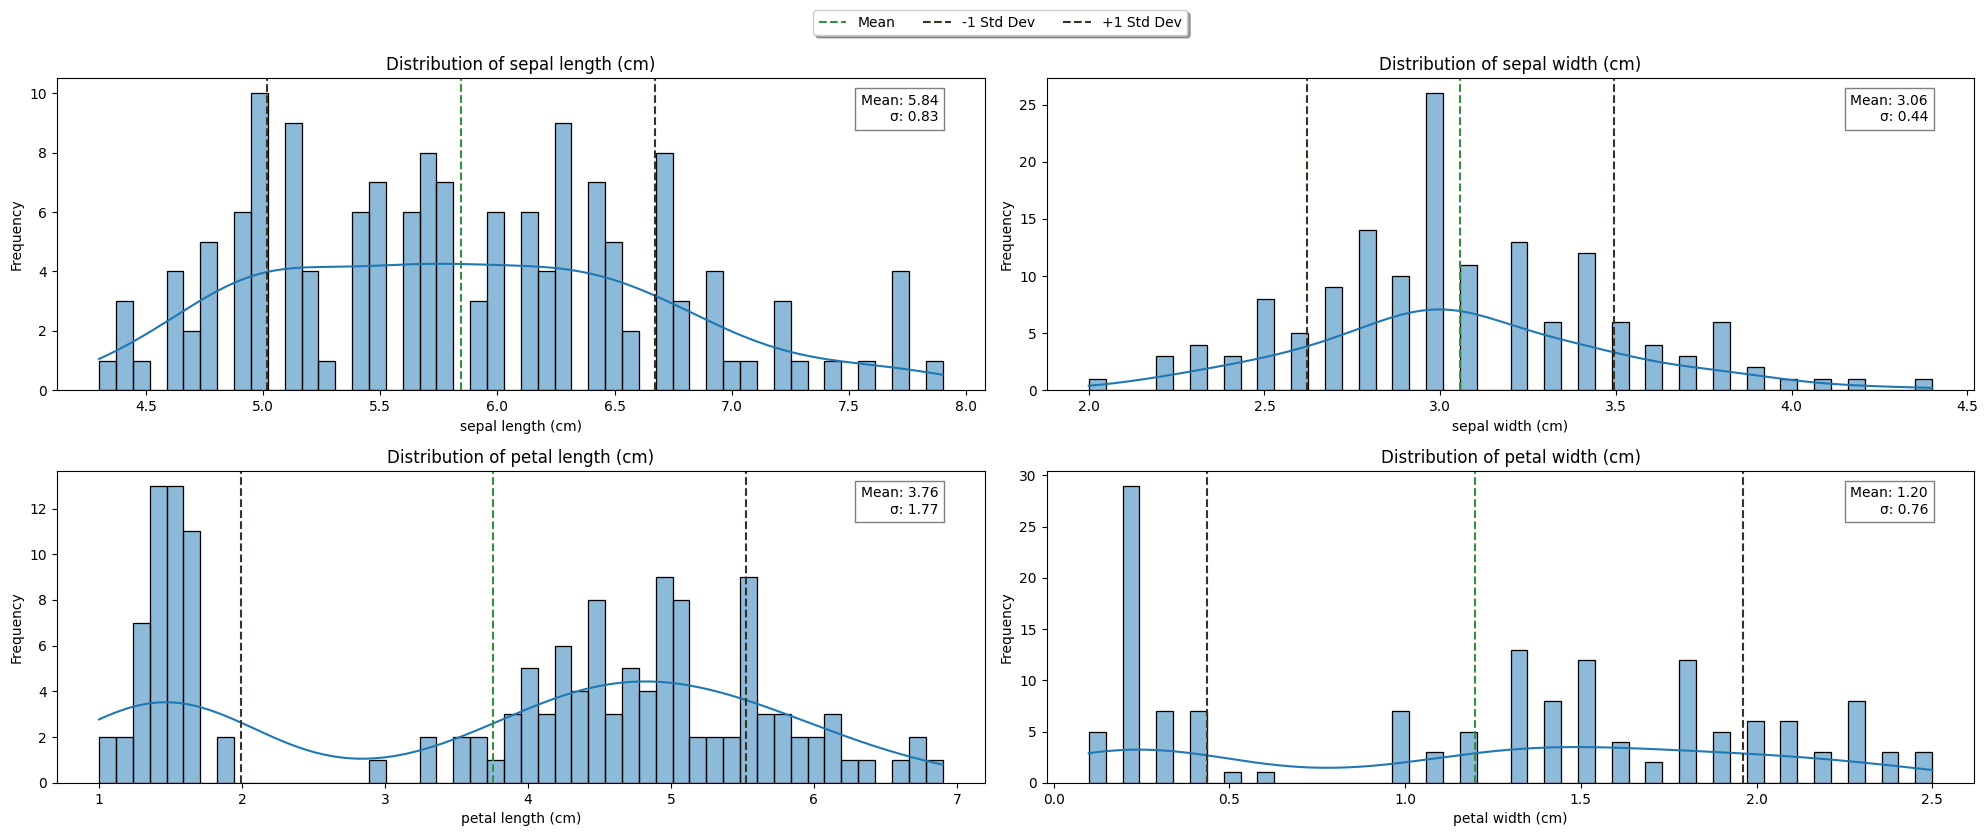

In [4]:
# Plot degli istogrammi per le caratteristiche numeriche
plt.figure(figsize=(20, 8))

for i, feature in enumerate(df.columns.drop('species')):
    plt.subplot((len(df.columns) - 1) // 2, 2, i + 1)
    sns.histplot(df[feature], bins=50, kde=True)
    
    # Calcola media e deviazione standard
    mean = df[feature].mean()
    std = df[feature].std()
    
    # Annotazioni
    plt.axvline(mean, color='#358f3f', linestyle='--', label='Mean')
    plt.axvline(mean - std, color='#383222', linestyle='--', label='-1 Std Dev')
    plt.axvline(mean + std, color='#383222', linestyle='--', label='+1 Std Dev')
    
    # Aggiungi testo con media e deviazione standard
    plt.text(0.95, 0.95, f'Mean: {mean:.2f}\nσ: {std:.2f}', 
             ha='right', va='top', 
             transform=plt.gca().transAxes, 
             fontsize=10, 
             bbox=dict(facecolor='white', alpha=0.5))
    
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.legend(loc='upper center', bbox_to_anchor=(-0.05, 2.5), fancybox=True, shadow=True, ncol=3)
plt.show()

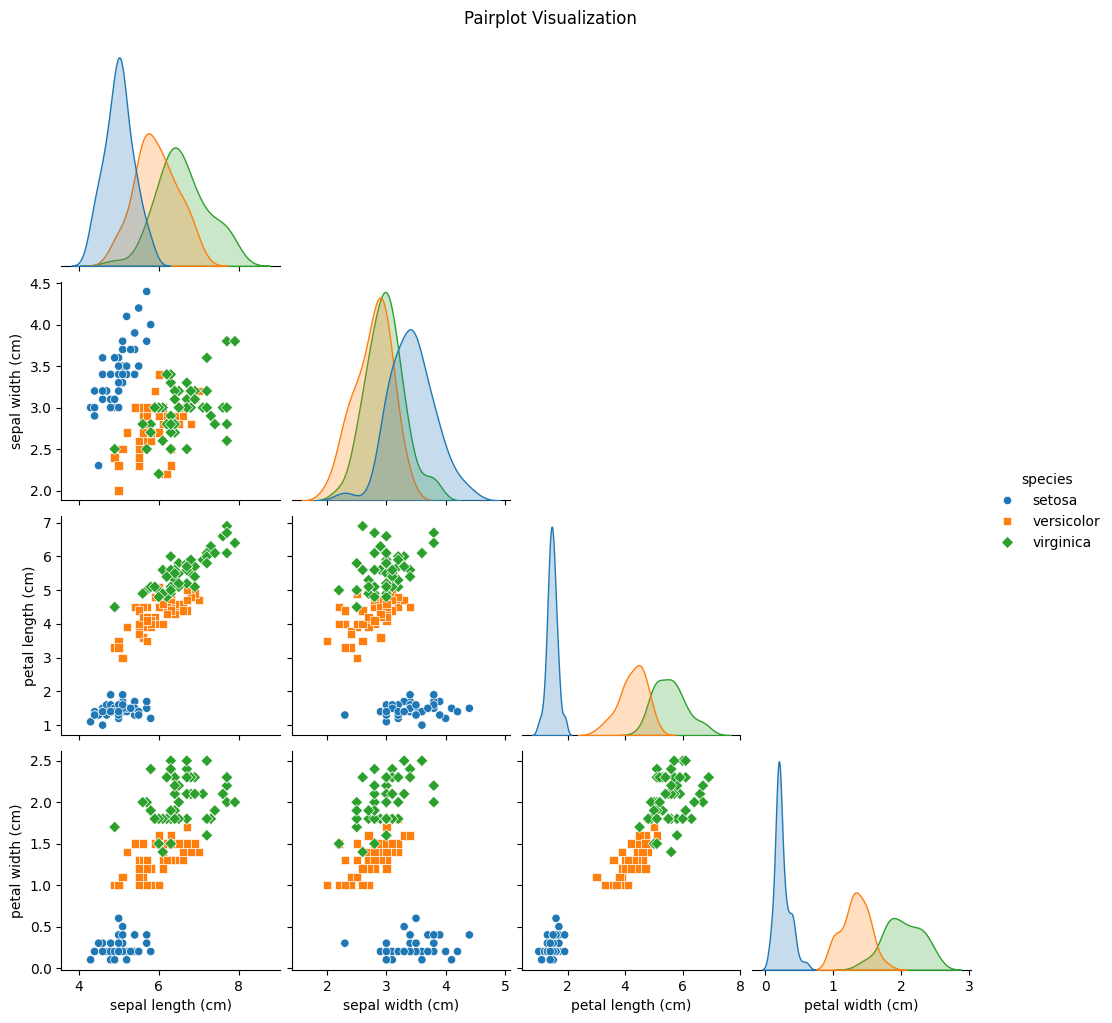

In [5]:
# Creiamo un pairplot per visualizzare i dati iniziali
sns.pairplot(df, hue='species', markers=["o", "s", "D"], corner=True)
plt.suptitle('Pairplot Visualization', y=1.02)
plt.show()

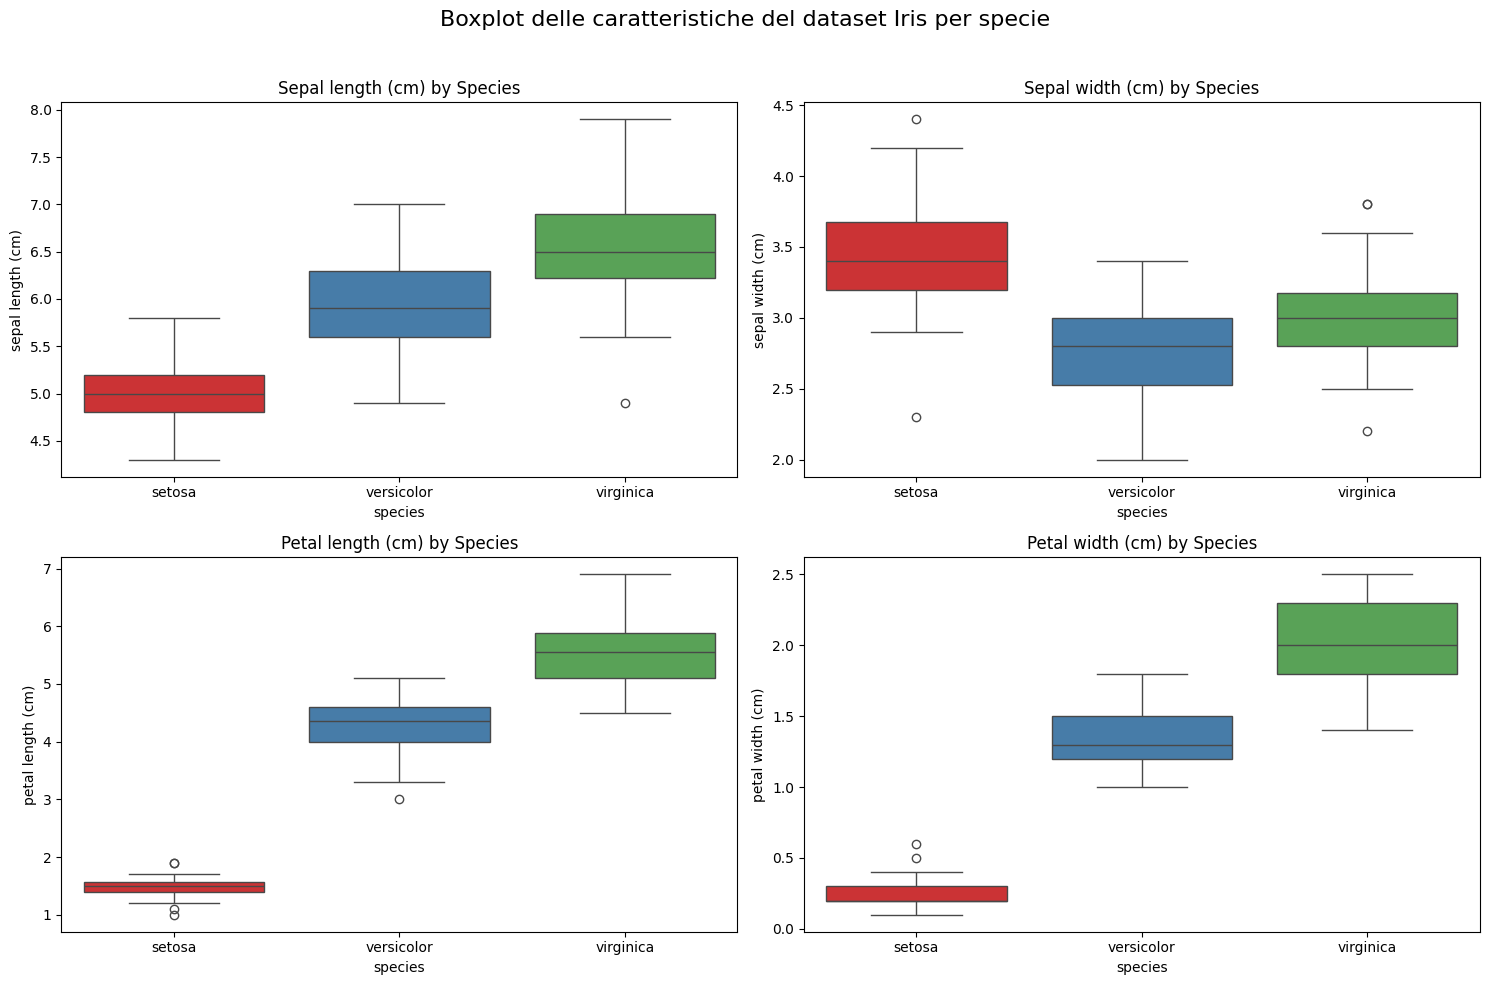

In [6]:
# Impostazione della dimensione della figura
plt.figure(figsize=(15, 10))
plt.suptitle('Boxplot delle caratteristiche del dataset Iris per specie', fontsize=16)

# Creazione di un boxplot per ogni caratteristica
for i, column in enumerate(df.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=column, data=df, palette='Set1', hue='species')
    plt.title(f'{column.capitalize()} by Species')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

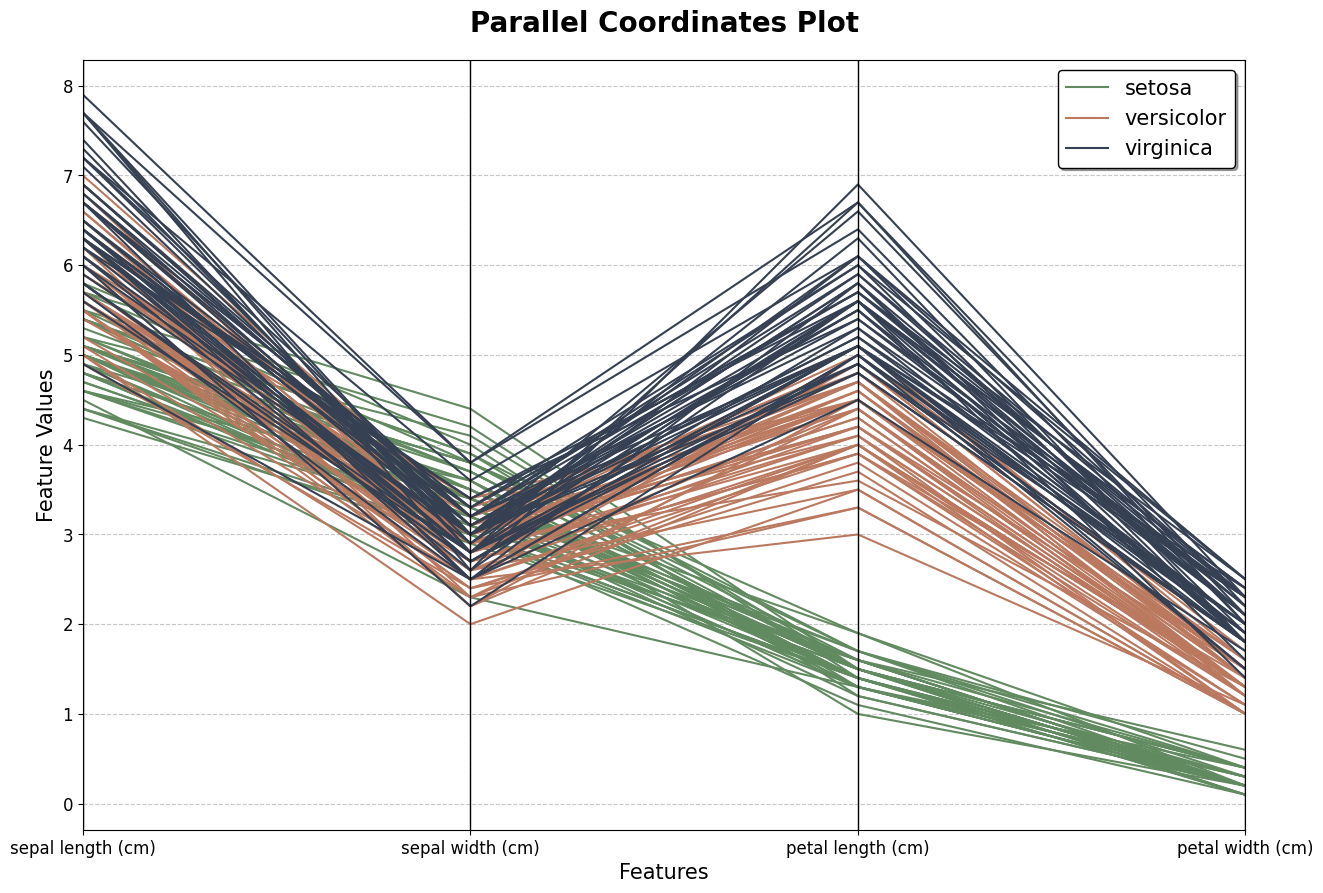

In [7]:
# Importiamo le librerie necessarie
from pandas.plotting import parallel_coordinates
import matplotlib.pyplot as plt

# Definizione di colori
pastel_colors = ['#628a60', '#ba795f', '#354052']

# Creiamo il plot delle coordinate parallele con colori desaturati e miglioramenti grafici
plt.figure(figsize=(15, 10))

# Utilizzo dei colori pastello
parallel_coordinates(df, "species", color=pastel_colors)

plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Feature Values', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiungiamo una legenda migliorata
plt.legend(loc='upper right', prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle='--', alpha=0.7)

# Mostriamo il plot
plt.show()


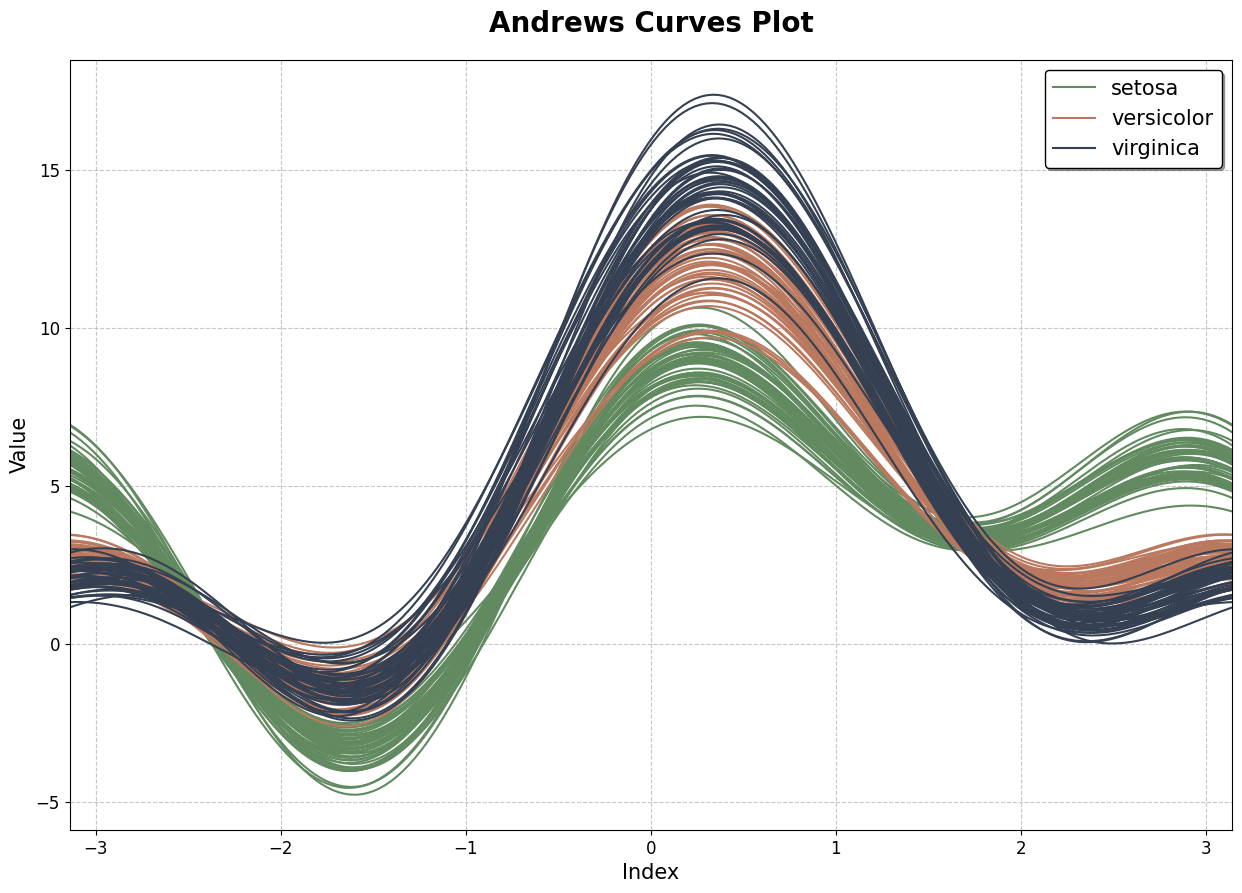

In [8]:
# Importiamo le librerie necessarie
from pandas.plotting import andrews_curves
import matplotlib.pyplot as plt

# Definizione di colori
pastel_colors = ['#628a60', '#ba795f', '#354052']

# Creiamo il plot delle curve di Andrews con colori desaturati e miglioramenti grafici
plt.figure(figsize=(15, 10))
andrews_curves(df, "species", color=pastel_colors)
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Index', fontsize=15)
plt.ylabel('Value', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Aggiungiamo una legenda migliorata
plt.legend(loc='upper right', prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle='--', alpha=0.7)

# Mostriamo il plot
plt.show()

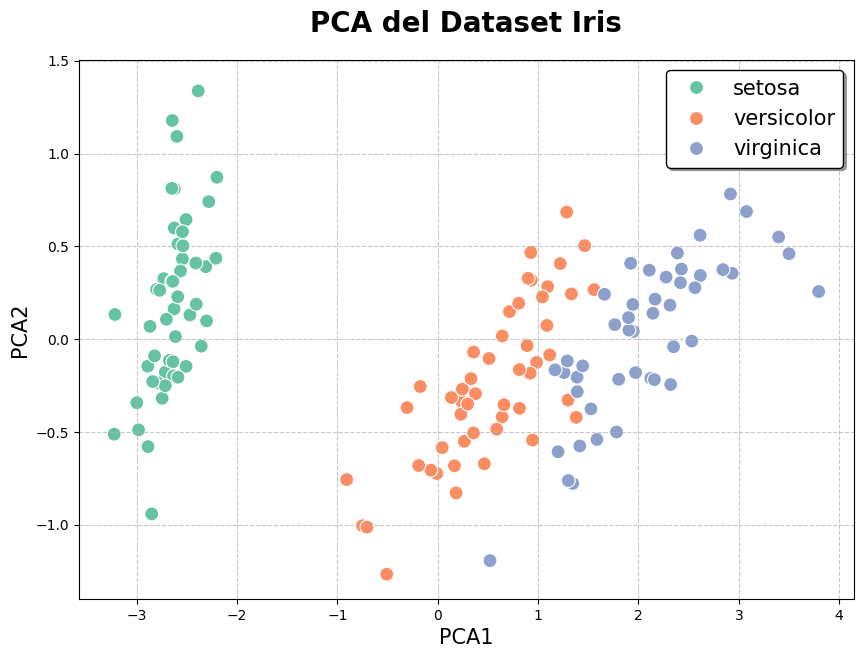

In [9]:
from sklearn.decomposition import PCA

# Esecuzione di PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.iloc[:, :-1])

# Creazione di un DataFrame per i risultati PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['species'] = df['species']

# Creazione del grafico PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='species', data=pca_df, palette='Set2', s=100)
plt.title('PCA del Dataset Iris', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('PCA1', fontsize=15)
plt.ylabel('PCA2', fontsize=15)
plt.legend(loc='upper right', prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

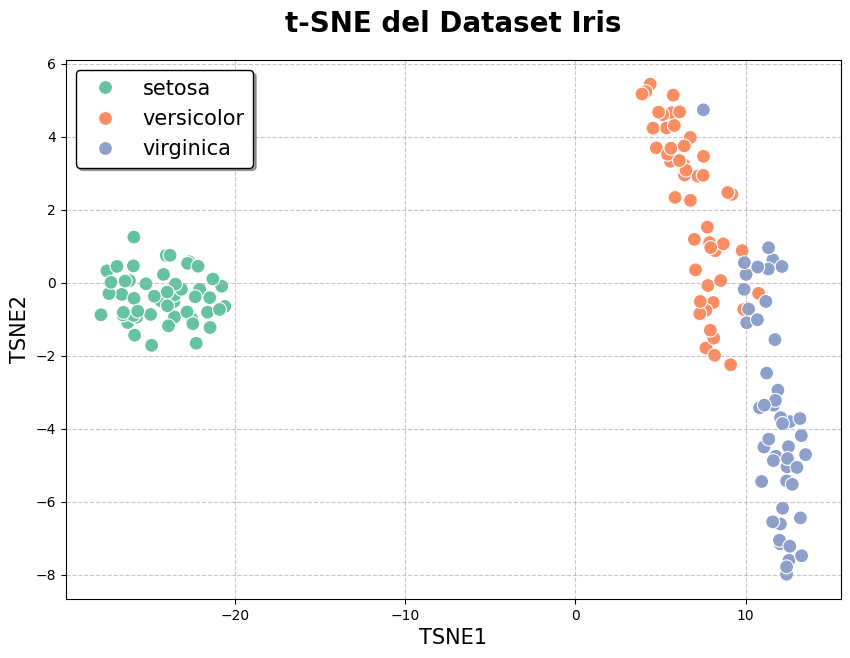

In [10]:
from sklearn.manifold import TSNE

# Esecuzione di t-SNE
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(df.iloc[:, :-1])

# Creazione di un DataFrame per i risultati t-SNE
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['species'] = df['species']

# Creazione del grafico t-SNE
plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='species', data=tsne_df, palette='Set2', s=100)
plt.title('t-SNE del Dataset Iris', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('TSNE1', fontsize=15)
plt.ylabel('TSNE2', fontsize=15)
plt.legend(loc='upper left', prop={'size': 15}, frameon=True, shadow=True, facecolor="white", edgecolor="black")
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()